In [6]:
file_path = '/data/zbw/inference_system/MIG_MPS/log/MPS_QPS'
class ConfigData:
    def __init__(self, sm, batch, p99):
        self.sm = sm  # SM值
        self.batch = batch  # Batch值
        self.p99 = p99  # P99值

    def __repr__(self):
        return f"ConfigData(SM: {self.sm}, Batch: {self.batch}, P99: {self.p99})"

def parse_line(line):
    parts = line.strip().split(", ")
    sm_batch = parts[0].split(" ")[1].split("+")
    sm = int(sm_batch[0])
    batch = int(sm_batch[1])
    p99 = float(parts[1].split(": ")[1])
    return ConfigData(sm, batch, p99)

def read_data_from_file(file_path):
    config_list = []
    with open(file_path, 'r') as file:
        for line in file:
            config = parse_line(line)
            config_list.append(config)
    return config_list

def find_max_batch_under_p99(config_list, sm_value, p99_threshold):
    max_batch = None
    for config in config_list:
        if config.sm == sm_value and config.p99 <= p99_threshold:
            if max_batch is None or config.batch > max_batch.batch:
                max_batch = config
    return max_batch

config_list = read_data_from_file(file_path)
SM_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
QPS_list = []
for i in SM_list:
    if i == 100:
        print(i, 54)
        QPS_list.append(54)
    else:
        QPS = find_max_batch_under_p99(config_list, i, 50)
        print(i, QPS)
        QPS_list.append(QPS)




10 None
20 None
30 None
40 ConfigData(SM: 40, Batch: 28, P99: 42.51382350921631)
50 ConfigData(SM: 50, Batch: 40, P99: 49.461913108825684)
60 ConfigData(SM: 60, Batch: 42, P99: 48.666465282440186)
70 ConfigData(SM: 70, Batch: 47, P99: 49.49800968170166)
80 ConfigData(SM: 80, Batch: 48, P99: 47.27973937988281)
90 ConfigData(SM: 90, Batch: 53, P99: 49.44894313812256)
100 54


TypeError: float() argument must be a string or a number, not 'ConfigData'

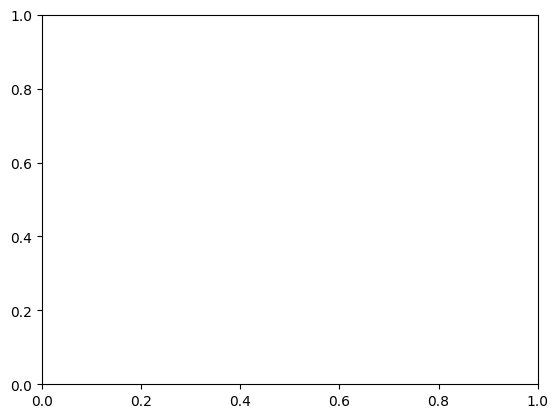

In [7]:
import matplotlib.pyplot as plt

x = SM_list
y = QPS_list

plt.plot(x, y, marker='o')  # 使用'o'标记点

# 添加标题和标签
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.grid(True)

# 显示图表
plt.show()
